In [34]:
import pandas as pd
import matplotlib.pyplot as plt

In [35]:
students = pd.read_csv("./clean/students.csv")
sessions = pd.read_csv("./clean/sessions.csv")

merged_df = sessions.merge(students, how="inner", on="ID")

## General Overview

How many sessions have I held and with how many students in each bootcamp?

In [36]:
total_sessions_all = sessions.ID.count()
total_sessions_data = merged_df.loc[merged_df.BOOTCAMP == 'DATA', 'ID'].count()
total_sessions_web = merged_df.loc[merged_df.BOOTCAMP == 'FULL_STACK', 'ID'].count()

total_students_all = students.ID.count()
total_students_data = students.loc[students.BOOTCAMP == 'DATA', 'ID'].count()
total_students_web = students.loc[students.BOOTCAMP == 'FULL_STACK', 'ID'].count()

print(
    "QUICK OVERVIEW\n"
    "--------[SESSIONS]-------------\n",
    f"\tTOTAL TUTORING SESSIONS: {total_sessions_all:,}\n",
    f"\tTOTAL DATA TUTORING SESSIONS: {total_sessions_data:,}\n",
    f"\tTOTAL FULL STACK TUTORING SESSIONS: {total_sessions_web}\n",
    "--------[STUDENTS]-------------\n",
    f"\tTOTAL STUDENTS (ALL): {total_students_all}\n",
    f"\tTOTAL STUDENTS (DATA): {total_students_data}\n",
    f"\tTOTAL STUDENTS (WEB): {total_students_web}\n"
)

QUICK OVERVIEW
--------[SESSIONS]-------------
 	TOTAL TUTORING SESSIONS: 1,757
 	TOTAL DATA TUTORING SESSIONS: 1,408
 	TOTAL FULL STACK TUTORING SESSIONS: 355
 --------[STUDENTS]-------------
 	TOTAL STUDENTS (ALL): 358
 	TOTAL STUDENTS (DATA): 254
 	TOTAL STUDENTS (WEB): 104



DATA STUDENTS: 254/358
WEB STUDENTS: 104/358


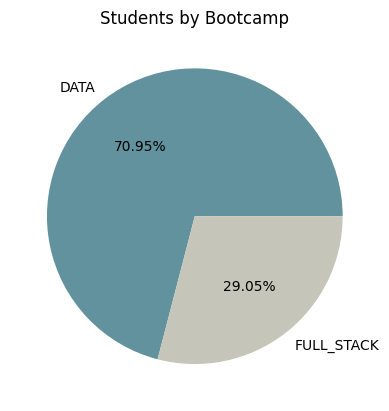

In [37]:
print(f"DATA STUDENTS: {total_students_data}/{total_students_all}")
print(f"WEB STUDENTS: {total_students_web}/{total_students_all}")
students.BOOTCAMP.value_counts().plot.pie(autopct="%1.2f%%", colors=["#62929e", "#c6c5b9"])
plt.title("Students by Bootcamp")
plt.ylabel("")
plt.show()

Looks like I have more Data students than Full Stack students. Does this inherently mean that there are more tutoring sessions for data students than full stack ones?

DATA SESSIONS: 1,408/1,757
WEB SESSIONS: 355/1,757


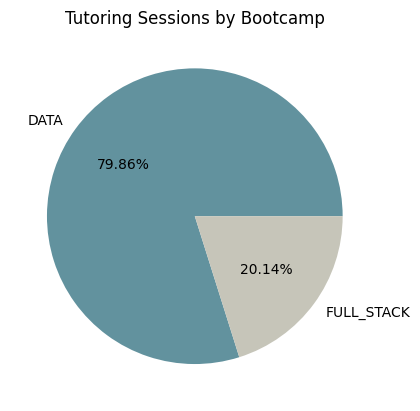

In [38]:
sessions_by_bootcamp = merged_df.BOOTCAMP.value_counts()
print(f"DATA SESSIONS: {total_sessions_data:,}/{total_sessions_all:,}")
print(f"WEB SESSIONS: {total_sessions_web}/{total_sessions_all:,}")
sessions_by_bootcamp.plot.pie(autopct="%1.2f%%", colors=["#62929e", "#c6c5b9"])
plt.title("Tutoring Sessions by Bootcamp")
plt.ylabel("")
plt.show()

There's more data sessions than full stack sessions, but that might just because I have more data students.

Let's look at the students individually and see how many sessions they book.

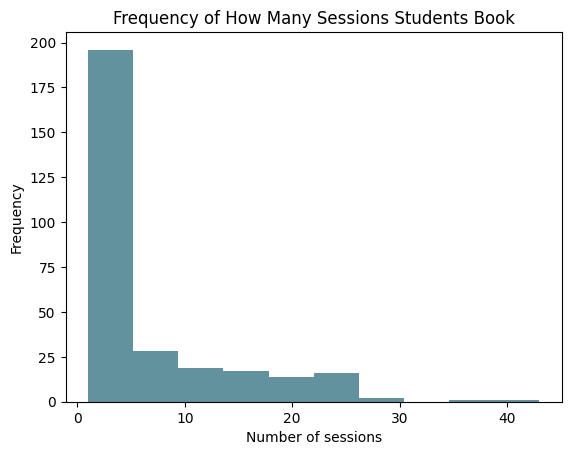

In [39]:
num_student_sessions = merged_df.groupby(["ID"])[["DATE"]].count()
num_student_sessions.plot.hist(color="#62929e", legend=None)
plt.title("Frequency of How Many Sessions Students Book")
plt.xlabel("Number of sessions")
plt.show()

We want to get an average for the students per bootcamp.

Since the distribution of student sessions is skewed right, we'll want to use median as our summary statistic.

We should also check the mode to see how many times most students from each bootcamp book.

In [40]:
bootcamp_with_student_sums = num_student_sessions.merge(students, how="inner", on="ID")[["ID", "DATE", "BOOTCAMP"]]
bootcamp_with_student_sums.columns = ["ID", "NUM_SESSIONS", "BOOTCAMP"]
bootcamp_with_student_sums.groupby(["BOOTCAMP"]).agg({"NUM_SESSIONS":["min", "median", "max", pd.Series.mode]})

NUM_SESSIONS                
                    min median max mode
BOOTCAMP                               
DATA                  1    3.0  36    1
FULL_STACK            1    1.0  43    1

<ipython-input-41-964eeb14836b>:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  bootcamp_with_student_sums.groupby(["BOOTCAMP"]).boxplot(column="NUM_SESSIONS",


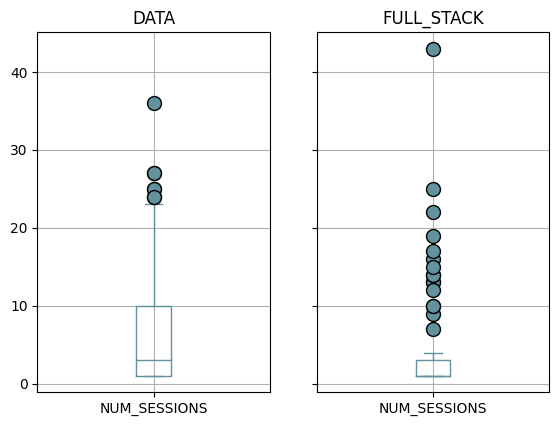

In [41]:
bootcamp_with_student_sums.groupby(["BOOTCAMP"]).boxplot(column="NUM_SESSIONS",
                                                         color="#62929e",
                                                         flierprops=dict(markerfacecolor='#62929e',markersize=10))
plt.show()

It looks like for Full-Stack, I have fewer students and they schedule fewer sessions. Data Analytics has more students who schedule more sessions--which makes sense as the Data Analytics bootcamp has SIGNIFICANTLY fewer tutors (meaning that I get randomly assigned students from there at a much higher rate and often end up substituting in for other tutors in Full Stack).

## Length of Sessions

How long is the average tutoring session? Per bootcamp? Per Student?

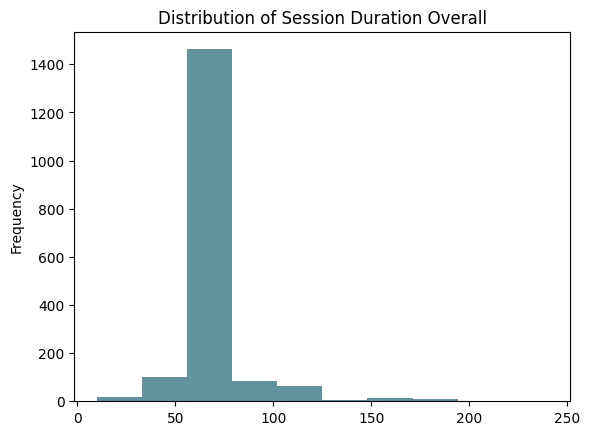

In [42]:
merged_df.DURATION.plot.hist(color="#62929e")
plt.title("Distribution of Session Duration Overall")
plt.show()

Since this distribution has a right skew, we'll use median again for the average.

In [43]:
overall_avg_duration = merged_df.agg({"DURATION":["median", "min", "max"]})
data_avg_duration = merged_df.loc[merged_df.BOOTCAMP == 'DATA'].agg({"DURATION":["median", "min", "max"]})
web_avg_duration = merged_df.loc[merged_df.BOOTCAMP == 'FULL_STACK'].agg({"DURATION":["median", "min", "max"]})

print(
    "QUICK SUMMARY OF TUTORING SESSION LENGTH\n",
    "--------[OVERALL]------------\n",
    f"\tMedian length of session overall: {overall_avg_duration.values[0][0]} minutes\n",
    f"\tOverall min session length: {overall_avg_duration.values[1][0]} minutes\n",
    f"\tOverall max session length: {overall_avg_duration.values[2][0]} minutes\n",
    "--------[DATA]------------\n",
    f"\tMedian length of data session: {data_avg_duration.values[0][0]} minutes\n",
    f"\tData min session length: {data_avg_duration.values[1][0]} minutes\n",
    f"\tData max session length: {data_avg_duration.values[2][0]} minutes\n",
    "--------[FULL STACK]------------\n",
    f"\tMedian length of full stack session: {web_avg_duration.values[0][0]} minutes\n",
    f"\tFull Stack min session length: {web_avg_duration.values[1][0]} minutes\n",
    f"\tFull Stack max session length: {web_avg_duration.values[2][0]} minutes\n",
)

QUICK SUMMARY OF TUTORING SESSION LENGTH
 --------[OVERALL]------------
 	Median length of session overall: 60.0 minutes
 	Overall min session length: 10.0 minutes
 	Overall max session length: 240.0 minutes
 --------[DATA]------------
 	Median length of data session: 60.0 minutes
 	Data min session length: 10.0 minutes
 	Data max session length: 240.0 minutes
 --------[FULL STACK]------------
 	Median length of full stack session: 60.0 minutes
 	Full Stack min session length: 15.0 minutes
 	Full Stack max session length: 240.0 minutes



In [44]:
data_student_sessions = merged_df.loc[merged_df.BOOTCAMP == "DATA"].groupby(["ID"])["DURATION"].count()
web_student_sessions = merged_df.loc[merged_df.BOOTCAMP == "FULL_STACK"].groupby(["ID"])["DURATION"].count()

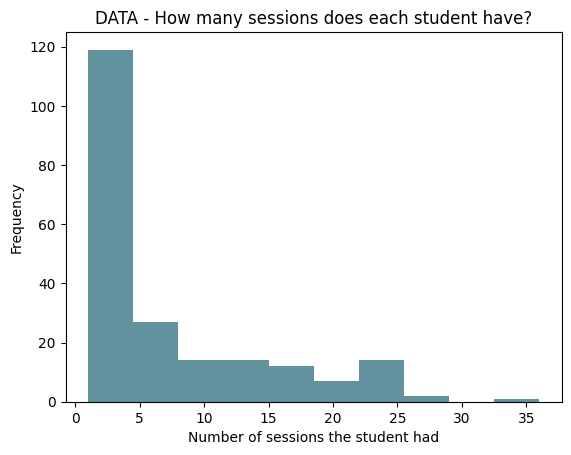

In [45]:
data_student_sessions.plot.hist(color="#62929e")
plt.title("DATA - How many sessions does each student have?")
plt.xlabel("Number of sessions the student had")
plt.show()

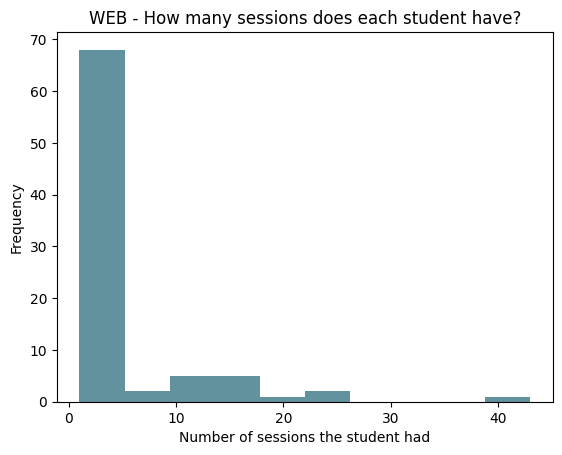

In [46]:
web_student_sessions.plot.hist(color="#62929e")
plt.title("WEB - How many sessions does each student have?")
plt.xlabel("Number of sessions the student had")
plt.show()

Since both of the above sets are right skewed, we'll use the median again for the center measurement.

In [47]:
print(
    "SESSIONS BY STUDENTS\n",
    "--------[DATA]------------\n",
    f"\tTOTAL STUDENTS: {data_student_sessions.count()}\n",
    f"\tTOTAL SESSIONS: {data_student_sessions.sum():,}\n",
    f"\tMedian number of sessions booked: {data_student_sessions.median():0.0f} sessions\n",
    f"\tMin number of sessions booked: {data_student_sessions.min()} sessions\n",
    f"\tMax number of sessions booked: {data_student_sessions.max()} sessions\n",
    "--------[WEB]------------\n",
    f"\tTOTAL STUDENTS: {web_student_sessions.count()}\n",
    f"\tTOTAL SESSIONS: {web_student_sessions.sum()}\n",
    f"\tMedian number of sessions booked: {web_student_sessions.median():0.0f} sessions\n",
    f"\tMin number of sessions booked: {web_student_sessions.min()} sessions\n",
    f"\tMax number of sessions booked: {web_student_sessions.max()} sessions\n",
)

SESSIONS BY STUDENTS
 --------[DATA]------------
 	TOTAL STUDENTS: 210
 	TOTAL SESSIONS: 1,408
 	Median number of sessions booked: 3 sessions
 	Min number of sessions booked: 1 sessions
 	Max number of sessions booked: 36 sessions
 --------[WEB]------------
 	TOTAL STUDENTS: 84
 	TOTAL SESSIONS: 355
 	Median number of sessions booked: 1 sessions
 	Min number of sessions booked: 1 sessions
 	Max number of sessions booked: 43 sessions



## How Many Sessions on Each Topic

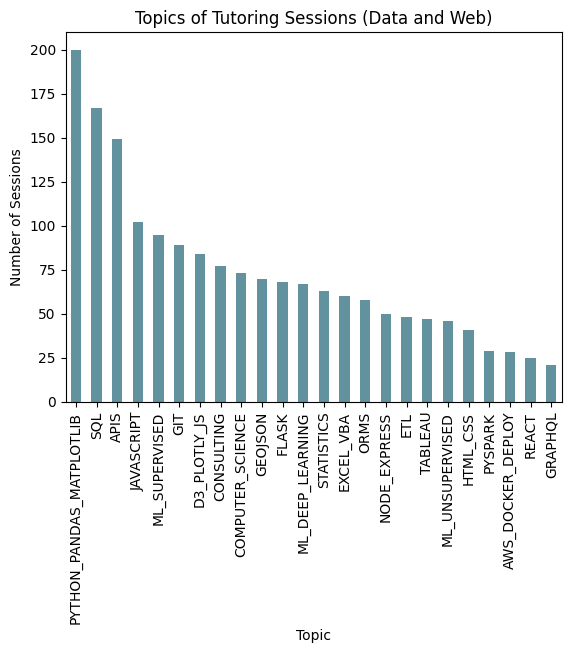

In [48]:
sessions["TOPIC"].value_counts().plot.bar(color="#62929e")
plt.title("Topics of Tutoring Sessions (Data and Web)")
plt.ylabel("Number of Sessions")
plt.xlabel("Topic")
plt.show()

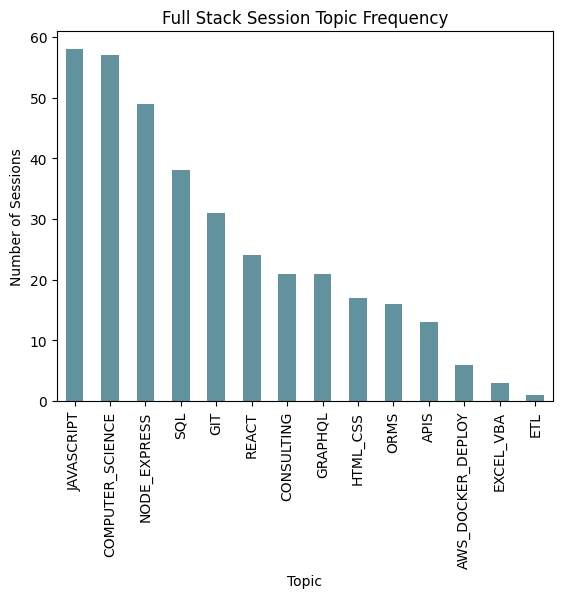

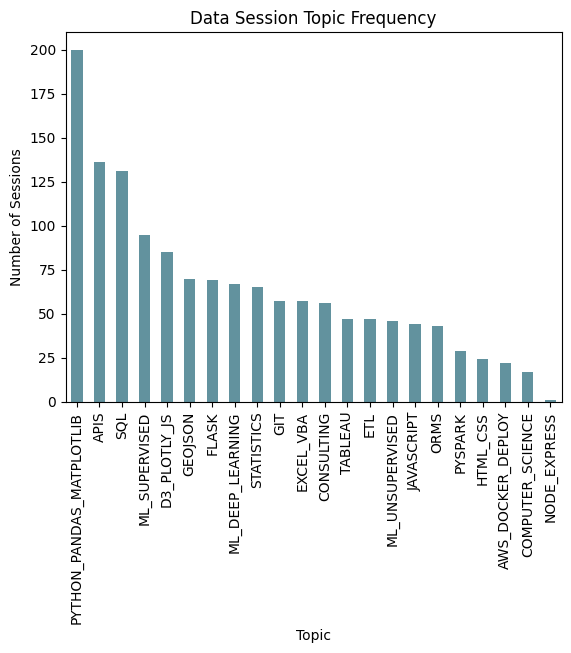

In [49]:
for bootcamp in merged_df.BOOTCAMP.unique():
  merged_df.loc[merged_df.BOOTCAMP == bootcamp]["TOPIC"].value_counts().plot.bar(color="#62929e")
  plt.title(f"{bootcamp.replace('_', ' ').title()} Session Topic Frequency")
  plt.ylabel("Number of Sessions")
  plt.xlabel("Topic")
  plt.show()

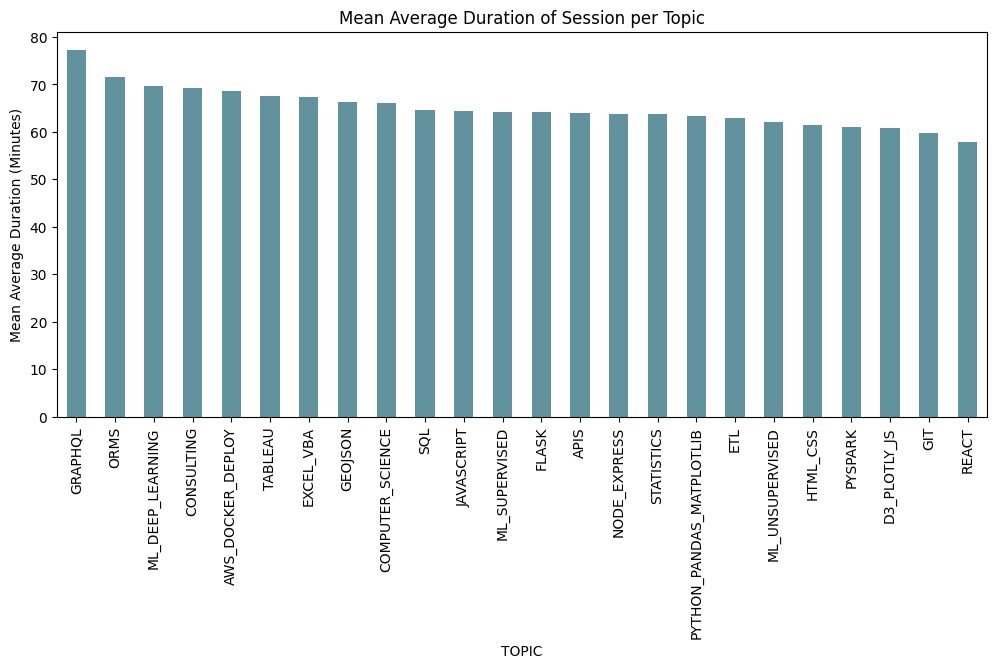

In [50]:
mean_duration_per_session = merged_df.groupby("TOPIC")["DURATION"].mean().sort_values(ascending=False)

mean_duration_per_session.plot.bar(figsize=(12,5), color="#62929e")
plt.title("Mean Average Duration of Session per Topic")
plt.ylabel("Mean Average Duration (Minutes)")
plt.show()

## Sessions Over Time

In [51]:
# Converting START and END back to datetime for resampling purposes
merged_df.START = pd.to_datetime(merged_df.START)
merged_df.END = pd.to_datetime(merged_df.END)

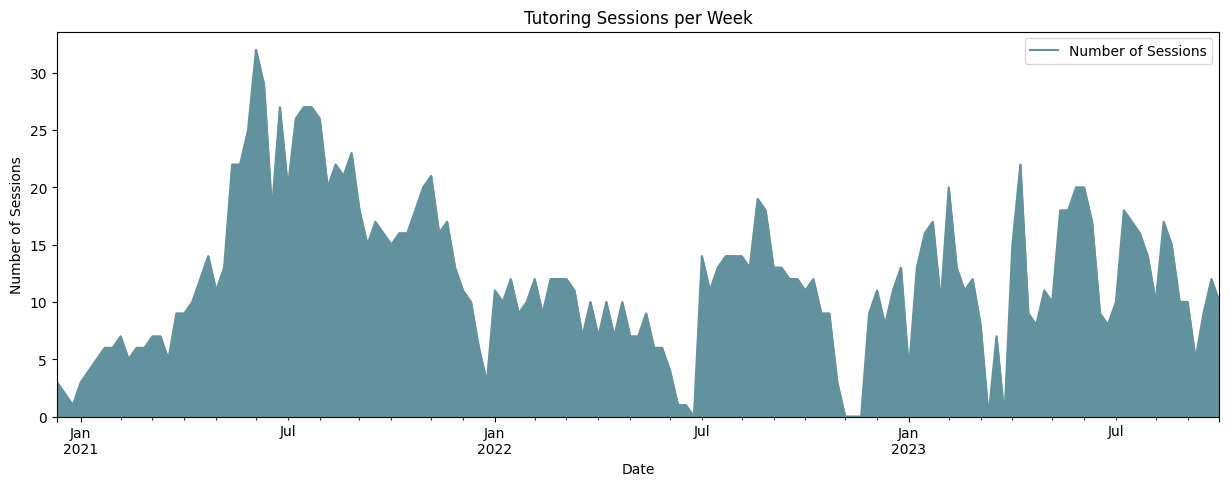

In [52]:
# Resampling the data so that we're looking at sessions per day
combined_daily_resample = merged_df.set_index("START").resample("D")["ID"].count()
combined_daily_resample.name = "num_sessions"
combined_daily_resample.index.name = "date"

# Resampling the data so we're looking at number of sessions per week
combined_weekly_resample = combined_daily_resample.resample("W").sum()
combined_weekly_resample.name = "total_num_sessions"
combined_weekly_resample

# Creating the plot
combined_weekly_resample.plot.area(figsize=(15,5), color="#62929e")
plt.title("Tutoring Sessions per Week")
plt.xlabel("Date")
plt.ylabel("Number of Sessions")
plt.legend(["Number of Sessions"])
plt.show()

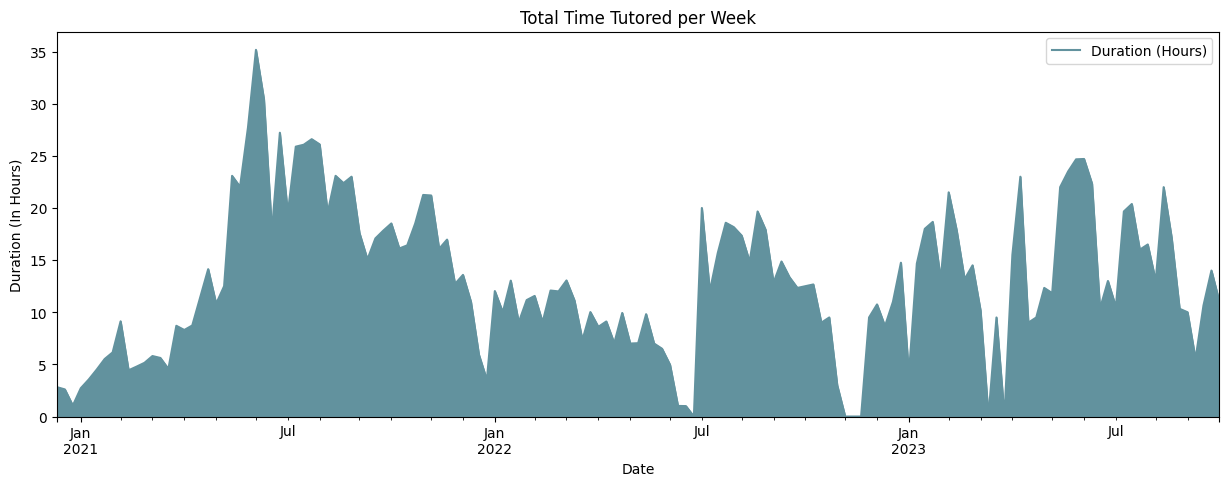

In [53]:
# Resampling the data so we're looking at total number of minutes spent tutoring a day
combined_daily_resample = merged_df.set_index("START").resample("D")["DURATION"].sum()
combined_daily_resample.name = "duration"
combined_daily_resample.index.name = "date"

# Resampling so that we're looking at total hours per week
combined_weekly_resample = combined_daily_resample.resample("W").sum() / 60
combined_weekly_resample.name = "total_duration"
combined_weekly_resample

# Plotting
combined_weekly_resample.plot.area(figsize=(15,5), color="#62929e")
plt.title("Total Time Tutored per Week")
plt.xlabel("Date")
plt.ylabel("Duration (In Hours)")
plt.legend(["Duration (Hours)"])
plt.show()

### Average Number of Sessions Per Day of the Week

This one probably won't tell too much since my schedule changes according to TA-ing, working, and university classes. However, I'm still curious.

In order to figure out average, I need to figure out which average I'm using, so I'll go ahead and look at the distribution.

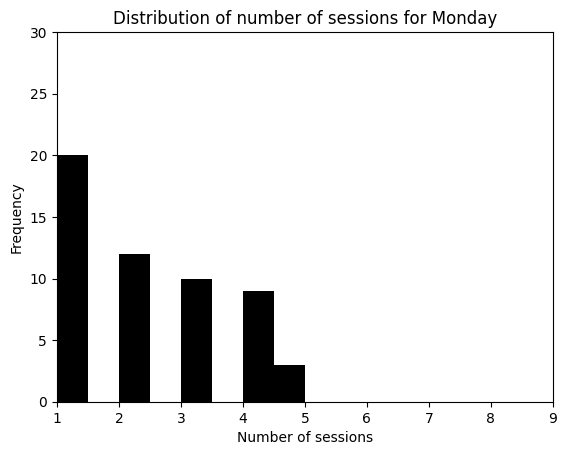

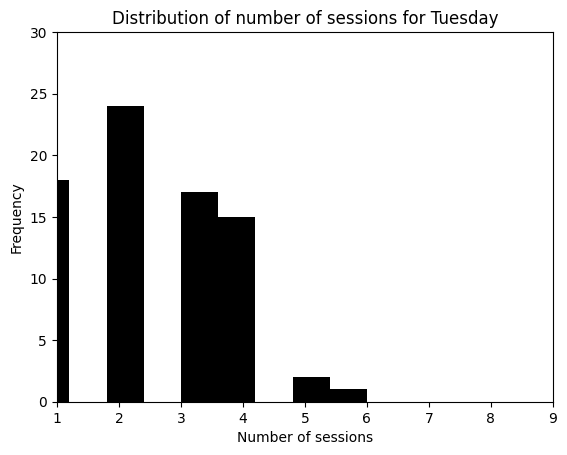

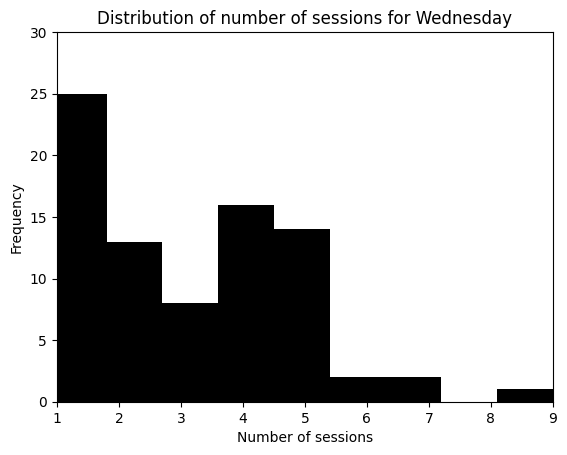

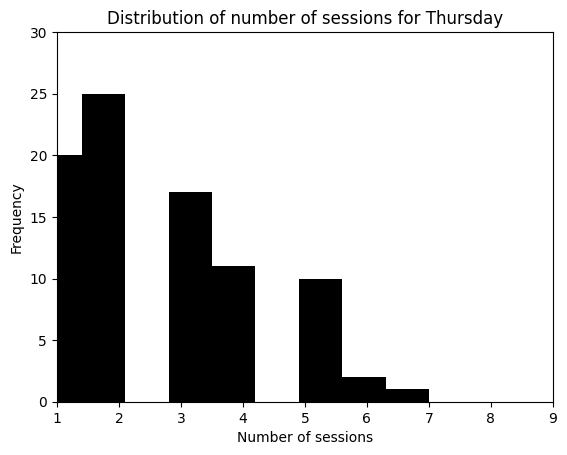

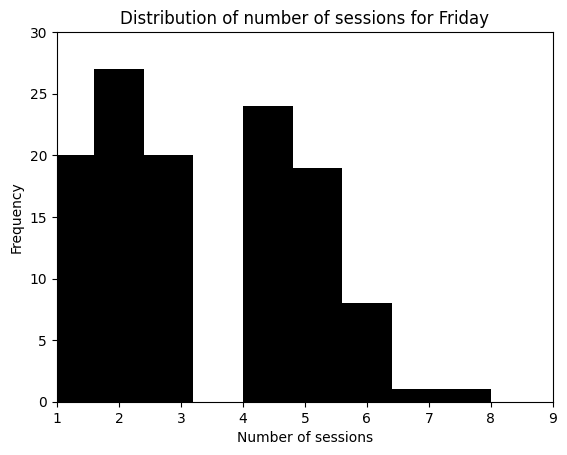

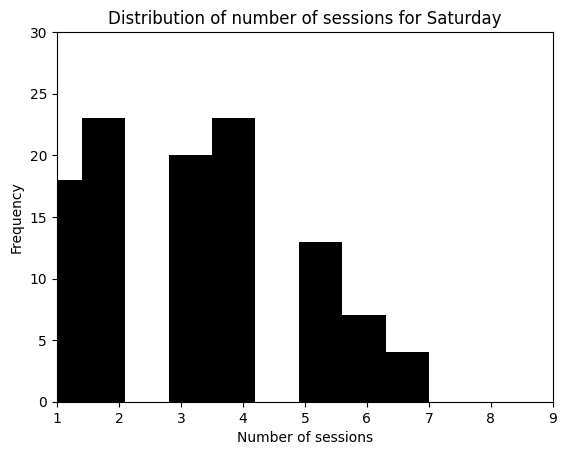

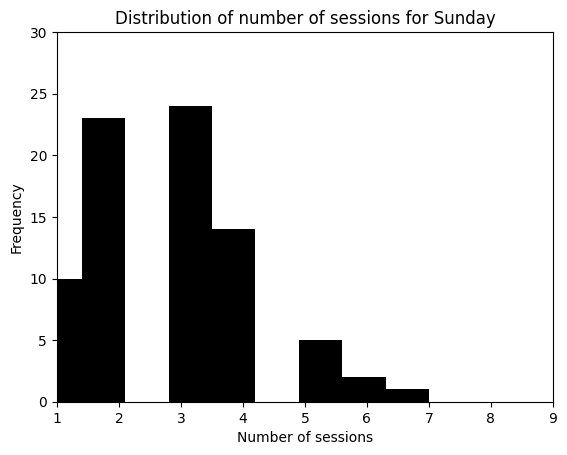

In [54]:
translate_date = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
combined_dow_resample = merged_df.set_index("START").resample("D")["ID"].count().reset_index()
combined_dow_resample["day_of_week"] = combined_dow_resample["START"].map(lambda d: translate_date[d.weekday()])
combined_dow_resample.drop("START", axis=1, inplace=True)

for dotw in translate_date:
  combined_dow_resample.loc[combined_dow_resample["day_of_week"] == dotw, "ID"].plot.hist(color="#000000")
  plt.title(f"Distribution of number of sessions for {dotw}")
  plt.xlabel("Number of sessions")
  plt.xlim(left=1, right=9)
  plt.ylim(bottom=0, top=30)
  plt.ylabel("Frequency")
  plt.show()

In [55]:
# Distribution is skewed, so we'll use median for the center
combined_dow_median_resample = combined_dow_resample.groupby("day_of_week").median().reindex(translate_date)
print("MEDIAN AVERAGE NUMBER OF SESSIONS PER DAY OF WEEK")
print("-" * 30)
print(combined_dow_median_resample)
print()


# Also, I'm curious to see which date in general has the highest number of sign-ups
# since I switched availability a lot over the years
combined_dow_max_resample = combined_dow_resample.groupby("day_of_week").max().reindex(translate_date)

print("MAX NUMBER OF SESSIONS PER DAY OF WEEK")
print("-" * 30)
print(combined_dow_max_resample)

MEDIAN AVERAGE NUMBER OF SESSIONS PER DAY OF WEEK
------------------------------
              ID
day_of_week     
Monday       0.0
Tuesday      1.0
Wednesday    1.0
Thursday     1.0
Friday       2.0
Saturday     2.0
Sunday       1.0

MAX NUMBER OF SESSIONS PER DAY OF WEEK
------------------------------
             ID
day_of_week    
Monday        5
Tuesday       6
Wednesday     9
Thursday      7
Friday        8
Saturday      7
Sunday        7


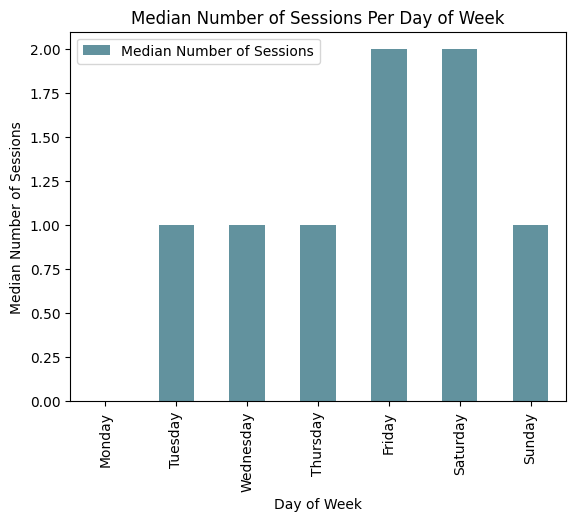

In [56]:
# Also, graphing this so it's a bit easier to see
combined_dow_median_resample.plot.bar(color="#62929e")
plt.title("Median Number of Sessions Per Day of Week")
plt.xlabel("Day of Week")
plt.ylabel("Median Number of Sessions")
plt.legend(["Median Number of Sessions"])
plt.show()

This makes sense as classes are typically Monday - Thursday and TA was typically Monday / Wednesday. Plus, this is over the course of almost 3 years, and switched availiabilities several times, so it makes sense the medians would be low.

I'm also curious to see the total number of sessions per day of the week.

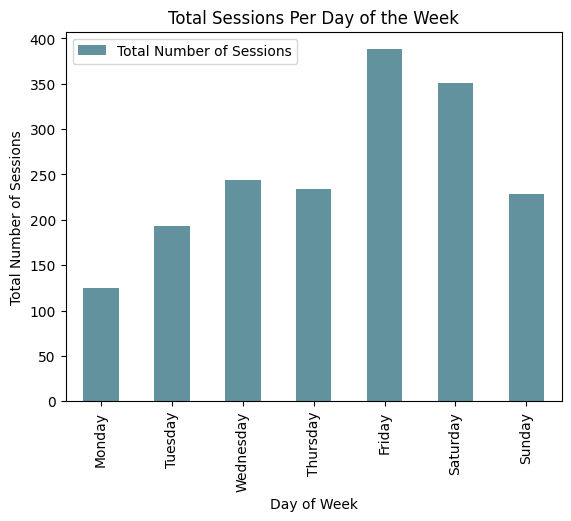

In [57]:
sum_dotw_resample = combined_dow_resample.groupby("day_of_week").sum().reindex(translate_date)
sum_dotw_resample.plot.bar(color="#62929e")
plt.title("Total Sessions Per Day of the Week")
plt.xlabel("Day of Week")
plt.ylabel("Total Number of Sessions")
plt.legend(["Total Number of Sessions"])
plt.show()

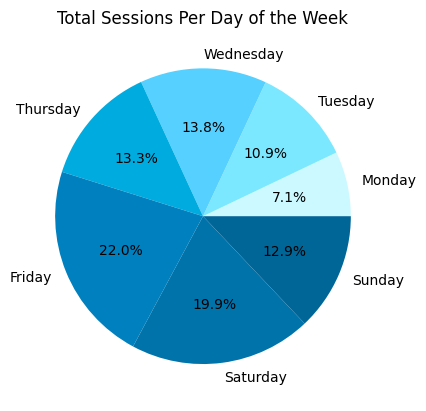

In [58]:
plt.pie(sum_dotw_resample["ID"], labels=sum_dotw_resample.index.to_list(), autopct="%1.1f%%", colors=["#ccf9ff","#7ce8ff",
                                                                                                      "#55d0ff", "#00acdf",
                                                                                                      "#0080bf", "#0073AB",
                                                                                                      "#006698"])
plt.title("Total Sessions Per Day of the Week")
plt.show()

Looks like Friday is the most consistent day for sessions--which makes sense as I've typically been available on Weekends.